In [20]:

# import necessary packages for case study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import urllib.request

#Load data
df_fundamentals = pd.read_csv("case3_fundamentals.csv", index_col=0)
df_prices_split = pd.read_csv("case3_prices-split-adjusted.csv")
df_securities = pd.read_csv("case3_securities.csv")

In [21]:

# replace ' ' with '.'
df_fundamentals.columns = [c.replace(' ', '.') for c in df_fundamentals.columns]
df_prices_split.columns = [c.replace(' ', '.') for c in df_prices_split.columns]
df_securities.columns = [c.replace(' ', '.') for c in df_securities.columns]


In [22]:
# Check Type of Variables
df_prices_split['date'] = pd.to_datetime(df_prices_split['date'],
               format='%Y-%m-%d')
df_securities['Date.first.added'] = pd.to_datetime(df_securities['Date.first.added'],
               format='%Y-%m-%d')
df_securities['CIK'] = df_securities.CIK.astype('category')
df_securities['Security'] = df_securities.Security.astype('category')
df_securities['GICS.Sub.Industry'] = df_securities['GICS.Sub.Industry'].astype('category')
df_securities['GICS.Sector'] = df_securities['GICS.Sector'].astype('category')
df_securities['Address.of.Headquarters'] = df_securities['Address.of.Headquarters'].astype('category')
df_securities['SEC.filings'] = df_securities['SEC.filings'].astype('category')
df_fundamentals['Period.Ending'] = pd.to_datetime(df_fundamentals['Period.Ending'],
               format='%Y-%m-%d')


In [23]:
df_merge1 = df_fundamentals.merge(df_prices_split, left_on = ['Period.Ending','Ticker.Symbol'], right_on = ['date', 'symbol'])
df_merge1

,Ticker.Symbol,Period.Ending,Accounts.Payable,Accounts.Receivable,Add'l.income/expense.items,After.Tax.ROE,Capital.Expenditures,Capital.Surplus,Cash.Ratio,Cash.and.Cash.Equivalents,...,For.Year,Earnings.Per.Share,Estimated.Shares.Outstanding,date,symbol,open,close,low,high,volume
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,2012.0,-5.60,3.350000e+08,2012-12-31,AAL,12.850000,13.500000,12.840000,13.680000,7005600.0
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,2013.0,-11.25,1.630222e+08,2013-12-31,AAL,24.740000,25.250000,24.629999,25.250000,7166600.0
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,2014.0,4.02,7.169154e+08,2014-12-31,AAL,53.900002,53.630001,53.320000,54.639999,10626000.0
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,2015.0,11.39,6.681299e+08,2015-12-31,AAL,42.540001,42.349998,41.830002,42.570000,6788900.0
4,ABBV,2013-12-31,6.448000e+09,681000000.0,-5.400000e+07,92.0,-4.910000e+08,3.671000e+09,144.0,9.595000e+09,...,2013.0,2.58,1.600000e+09,2013-12-31,ABBV,52.990002,52.810001,52.360001,53.060001,3019700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,ZION,2014-12-31,0.000000e+00,0.0,-4.442200e+07,5.0,-1.757990e+08,0.000000e+00,NaN,1.396843e+10,...,2014.0,1.68,2.371798e+08,2014-12-31,ZION,28.680000,28.510000,28.490000,28.770000,1470800.0
1353,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,1.576313e+10,...,2015.0,1.20,2.578925e+08,2015-12-31,ZION,27.260000,27.299999,27.139999,27.639999,1737600.0
1354,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,...,2013.0,1.01,4.990099e+08,2013-12-31,ZTS,32.799999,32.689999,32.459999,32.810001,2270400.0
1355,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,...,2014.0,1.16,5.025862e+08,2014-12-31,ZTS,43.459999,43.029999,43.000000,43.880001,2131900.0


In [24]:
df_merge1 = df_merge1.drop(['date', 'symbol'], axis=1)
df_merge1


,Ticker.Symbol,Period.Ending,Accounts.Payable,Accounts.Receivable,Add'l.income/expense.items,After.Tax.ROE,Capital.Expenditures,Capital.Surplus,Cash.Ratio,Cash.and.Cash.Equivalents,...,Total.Revenue,Treasury.Stock,For.Year,Earnings.Per.Share,Estimated.Shares.Outstanding,open,close,low,high,volume
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08,12.850000,13.500000,12.840000,13.680000,7005600.0
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08,24.740000,25.250000,24.629999,25.250000,7166600.0
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,4.265000e+10,0.0,2014.0,4.02,7.169154e+08,53.900002,53.630001,53.320000,54.639999,10626000.0
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,4.099000e+10,0.0,2015.0,11.39,6.681299e+08,42.540001,42.349998,41.830002,42.570000,6788900.0
4,ABBV,2013-12-31,6.448000e+09,681000000.0,-5.400000e+07,92.0,-4.910000e+08,3.671000e+09,144.0,9.595000e+09,...,1.879000e+10,-320000000.0,2013.0,2.58,1.600000e+09,52.990002,52.810001,52.360001,53.060001,3019700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,ZION,2014-12-31,0.000000e+00,0.0,-4.442200e+07,5.0,-1.757990e+08,0.000000e+00,NaN,1.396843e+10,...,2.361631e+09,0.0,2014.0,1.68,2.371798e+08,28.680000,28.510000,28.490000,28.770000,1470800.0
1353,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,1.576313e+10,...,2.210591e+09,0.0,2015.0,1.20,2.578925e+08,27.260000,27.299999,27.139999,27.639999,1737600.0
1354,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,...,4.561000e+09,0.0,2013.0,1.01,4.990099e+08,32.799999,32.689999,32.459999,32.810001,2270400.0
1355,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,...,4.785000e+09,0.0,2014.0,1.16,5.025862e+08,43.459999,43.029999,43.000000,43.880001,2131900.0


In [25]:

df_merge2 = df_merge1.merge(df_securities, left_on='Ticker.Symbol', right_on='Ticker.symbol')
df_merge2


,Ticker.Symbol,Period.Ending,Accounts.Payable,Accounts.Receivable,Add'l.income/expense.items,After.Tax.ROE,Capital.Expenditures,Capital.Surplus,Cash.Ratio,Cash.and.Cash.Equivalents,...,high,volume,Ticker.symbol,Security,SEC.filings,GICS.Sector,GICS.Sub.Industry,Address.of.Headquarters,Date.first.added,CIK
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,13.680000,7005600.0,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,25.250000,7166600.0,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,54.639999,10626000.0,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,42.570000,6788900.0,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
4,ABBV,2013-12-31,6.448000e+09,681000000.0,-5.400000e+07,92.0,-4.910000e+08,3.671000e+09,144.0,9.595000e+09,...,53.060001,3019700.0,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,ZION,2014-12-31,0.000000e+00,0.0,-4.442200e+07,5.0,-1.757990e+08,0.000000e+00,NaN,1.396843e+10,...,28.770000,1470800.0,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaT,109380
1353,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,1.576313e+10,...,27.639999,1737600.0,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaT,109380
1354,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,...,32.810001,2270400.0,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280
1355,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,...,43.880001,2131900.0,ZTS,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280


In [26]:

df_merge2 = df_merge2.drop('Ticker.symbol', axis=1)
df_merge2

,Ticker.Symbol,Period.Ending,Accounts.Payable,Accounts.Receivable,Add'l.income/expense.items,After.Tax.ROE,Capital.Expenditures,Capital.Surplus,Cash.Ratio,Cash.and.Cash.Equivalents,...,low,high,volume,Security,SEC.filings,GICS.Sector,GICS.Sub.Industry,Address.of.Headquarters,Date.first.added,CIK
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,12.840000,13.680000,7005600.0,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,24.629999,25.250000,7166600.0,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,53.320000,54.639999,10626000.0,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,41.830002,42.570000,6788900.0,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
4,ABBV,2013-12-31,6.448000e+09,681000000.0,-5.400000e+07,92.0,-4.910000e+08,3.671000e+09,144.0,9.595000e+09,...,52.360001,53.060001,3019700.0,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,ZION,2014-12-31,0.000000e+00,0.0,-4.442200e+07,5.0,-1.757990e+08,0.000000e+00,NaN,1.396843e+10,...,28.490000,28.770000,1470800.0,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaT,109380
1353,ZION,2015-12-31,0.000000e+00,0.0,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,1.576313e+10,...,27.139999,27.639999,1737600.0,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaT,109380
1354,ZTS,2013-12-31,1.381000e+09,-99000000.0,9.000000e+06,54.0,-1.840000e+08,8.780000e+08,43.0,6.100000e+08,...,32.459999,32.810001,2270400.0,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280
1355,ZTS,2014-12-31,1.071000e+09,69000000.0,-7.000000e+06,44.0,-1.800000e+08,9.580000e+08,81.0,8.820000e+08,...,43.000000,43.880001,2131900.0,Zoetis,reports,Health Care,Pharmaceuticals,"Florham Park, New Jersey",2013-06-21,1555280


In [27]:
# Exclude the sector 'Financials' as it generally behaves different as compared to the other sectors.
df_merge2 = df_merge2[df_merge2['GICS.Sector'] != 'Financials']

# Remove rows containing NA
df_merge2 = df_merge2.dropna(subset=['Estimated.Shares.Outstanding'])

#Remove entries that are not reasonable
df_merge2 = df_merge2[df_merge2['Earnings.Before.Tax']>0]
df_merge2 = df_merge2[df_merge2['Short-Term.Debt./.Current.Portion.of.Long-Term.Debt']>0]
df_merge2 = df_merge2[df_merge2['Estimated.Shares.Outstanding']>0]
df_merge2 = df_merge2[df_merge2['Sales,.General.and.Admin.']>0]

# Filter 'Period.Ending' for the last day of each years
# Find more elegant way of doing this
df_ana12to15 = df_merge2[(df_merge2['Period.Ending'] == '2012-12-31') | 
        (df_merge2['Period.Ending'] == '2013-12-31') |
        (df_merge2['Period.Ending'] == '2014-12-31') |
        (df_merge2['Period.Ending'] == '2015-12-31')]
df_ana12to15['Period.Ending'] = pd.DatetimeIndex(df_ana12to15['Period.Ending']).year

/var/folders/m3/xzzyd2195pg_n5xvcz71sc4w0000gn/T/ipykernel_15688/2691083109.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ana12to15['Period.Ending'] = pd.DatetimeIndex(df_ana12to15['Period.Ending']).year


In [28]:
print(df_ana12to15['Period.Ending']).year

2       2014
3       2015
4       2013
5       2014
6       2015
        ... 
1341    2015
1346    2012
1354    2013
1355    2014
1356    2015
Name: Period.Ending, Length: 705, dtype: int64


AttributeError: 'NoneType' object has no attribute 'year'

In [ ]:
df_ana12to15['GICS.Sector']

2       Industrials
3       Industrials
4       Health Care
5       Health Care
6       Health Care
           ...     
1341    Industrials
1346    Health Care
1354    Health Care
1355    Health Care
1356    Health Care
Name: GICS.Sector, Length: 705, dtype: category
Categories (11, object): ['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', ..., 'Materials', 'Real Estate', 'Telecommunications Services', 'Utilities']

In [29]:
# Drop unused categories
print(df_ana12to15['GICS.Sector'].cat.categories)

Index(['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials',
       'Health Care', 'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Telecommunications Services', 'Utilities'],
      dtype='object')


In [30]:
df_ana12to15['GICS.Sector'] = df_ana12to15['GICS.Sector'].cat.remove_unused_categories()


/var/folders/m3/xzzyd2195pg_n5xvcz71sc4w0000gn/T/ipykernel_15688/4174548140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ana12to15['GICS.Sector'] = df_ana12to15['GICS.Sector'].cat.remove_unused_categories()


In [31]:
print(df_ana12to15['GICS.Sector'].cat.categories)

Index(['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Health Care',
       'Industrials', 'Information Technology', 'Materials', 'Real Estate',
       'Telecommunications Services', 'Utilities'],
      dtype='object')


Calculating multiples using location parameters
Use the basic knowledge in Python acquired in the previous case studies to create a subset of df_ana12to15 called df_HC that contains only observations from the Health Care sector for the years 2012 to 2014. Determine the multiple for df_HC based on the three location parameters

Arithmetic mean

Median

Harmonic mean.
Then, calculate the company values on the basis of the resulting multiples as well as their relative deviations (errors) from the actual company values. Next, plot the density curves of the relative errors. Which location parameter tends to overestimate the true enterprise value?

Note: To determine the multiples based on the location parameters, the EV/EBITDA ratio must first be determined for each company.

In [ ]:
from statistics import harmonic_mean, mean, median

# filter health care sector from 2012 - 2014
df_HC = df_ana12to15[(df_ana12to15['GICS.Sector'] == 'Health Care') 
                     & (df_ana12to15['Period.Ending'] < 2015)]
# Calculate EBITDA and EV
df_HC['EBITDA'] = df_HC['Earnings.Before.Interest.and.Tax'] + df_HC['Depreciation'] 
df_HC['EV'] = df_HC['close']*df_HC['Estimated.Shares.Outstanding']+df_HC['Total.Liabilities']-df_HC['Cash.and.Cash.Equivalents']
df_HC['Multiple'] = df_HC['EV'] / df_HC['EBITDA']

arithMean = mean(df_HC['Multiple'])
median_Multiple = median(df_HC['Multiple'])
harmoMean = harmonic_mean(df_HC['Multiple'])
df_HC['estimated_EV_arithMean'] =  df_HC['EBITDA'] * arithMean
df_HC['estimated_EV_median'] =  df_HC['EBITDA'] * median_Multiple
df_HC['estimated_EV_harmoMean'] =  df_HC['EBITDA'] * harmoMean
df_HC['deviation_arithMean'] = df_HC['EV'] - df_HC['estimated_EV_arithMean']
df_HC['deviation_median'] = df_HC['EV'] - df_HC['estimated_EV_median']
df_HC['deviation_harmoMean'] = df_HC['EV'] - df_HC['estimated_EV_harmoMean']

df_HC

In [33]:
df_HC_deviation_arithMean = df_HC['deviation_arithMean']
df_HC_deviation_median = df_HC['deviation_arithMean']
df_HC_deviation_harmoMean = df_HC['deviation_harmoMean']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

plt.hist(df_HC_deviation_arithMean,rwidth=0.3, alpha=0.8, label='arithMean as Multiple')
plt.hist(df_HC_deviation_median, rwidth=0.3, alpha=0.5,label='Median as Multiple')
plt.hist(df_HC_deviation_harmoMean, rwidth=0.3, alpha=0.5,label='harmoMean as Multiple')
plt.legend(loc='upper left')
plt.show()


NameError: name 'df_HC_deviation_arithMean' is not defined

In [ ]:
import plotly.figure_factory as ff
import numpy as np
hist_df_DC = [df_HC['deviation_arithMean'].to_numpy()]
label_arith =['error arithMean']

fig_arith = ff.create_distplot(hist_df_DC, label_arith, bin_size=1000000000)
fig_arith.show()

In [11]:
df_q2_multipier = {20627/1534, 18093/1322, 23029/1863, 13626/1245, 27635/2109, 11626/1075, 16430/1408, 23626/1900, 25324/2033}
q2_arithMean = mean(df_q2_multipier)
q2_median_Multiple = median(df_q2_multipier)
q2_harmoMean = harmonic_mean(df_q2_multipier)
q2_f_EBITDA = 1289


In [17]:
q2_harmoMean* q2_f_EBITDA

15786.235867525973

In [ ]:
df_Mat = df_ana12to15[(df_ana12to15['GICS.Sector'] == 'Materials') 
                     & (df_ana12to15['Period.Ending']<2014)]
df_Mat


In [38]:
# Calculate EBITDA and EV
df_Mat['EBITDA'] = df_Mat['Earnings.Before.Interest.and.Tax'] + df_Mat['Depreciation'] 
df_Mat['EV'] = df_Mat['close']*df_Mat['Estimated.Shares.Outstanding']+df_Mat['Total.Liabilities']-df_Mat['Cash.and.Cash.Equivalents']

/var/folders/m3/xzzyd2195pg_n5xvcz71sc4w0000gn/T/ipykernel_15688/3118907916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mat['EBITDA'] = df_Mat['Earnings.Before.Interest.and.Tax'] + df_Mat['Depreciation']
/var/folders/m3/xzzyd2195pg_n5xvcz71sc4w0000gn/T/ipykernel_15688/3118907916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mat['EV'] = df_Mat['close']*df_Mat['Estimated.Shares.Outstanding']+df_Mat['Total.Liabilities']-df_Mat['Cash.and.Cash.Equivalents']


In [39]:
# Running the first regression 
reg_Mat = sm.OLS(df_Mat['EV'], sm.add_constant(df_Mat['EBITDA'])).fit()

In [40]:
reg_Mat.params

const     8.345253e+09
EBITDA    8.069811e+00
dtype: float64

an increase in  EBITDA (x) of 1 million USD leads on average to an increase in the estimated enterprise value 
 EV head of 8238 * 10^6 USD.

In [41]:
import plotly.express as px

fig = px.scatter(
    df_Mat, x='EBITDA', y='EV', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig

In [42]:
import plotly.figure_factory as ff
import numpy as np

hist_data = [df_Mat['EV'].to_numpy()]
group_labels = ['EV'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, bin_size=1000000000)
fig.show()

In [43]:
hist_data = [df_Mat['EBITDA'].to_numpy()]
group_labels = ['EBITDA'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, bin_size=1000000000)
fig.show()

In [44]:
# Logarithmic transformation of EBITDA and EV
df_Mat['lgEBITDA'] = np.log(df_Mat['EBITDA'])
df_Mat['lgEV'] = np.log(df_Mat['EV'])

In [45]:
hist_data = [df_Mat['lgEV'].to_numpy()]
group_labels = ['lgEV'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, bin_size=1000000000)
fig.show()

In [46]:
hist_data = [df_Mat['lgEBITDA'].to_numpy()]
group_labels = ['lgEBITDA'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels, bin_size=1000000000)
fig.show()

In [47]:
# Running the log-log regression
df_Mat_OLS = df_Mat[['lgEV', 'lgEBITDA']]
reg2_Mat = sm.OLS(df_Mat['lgEV'], sm.add_constant(df_Mat['lgEBITDA'])).fit()

In [48]:
reg2_Mat.params

const       7.911511
lgEBITDA    0.746086
dtype: float64

In [49]:
fig = px.scatter(
    df_Mat, x='lgEBITDA', y='lgEV', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig

In [ ]:
tab = df_ana12to15.groupby(['GICS.Sector', 'Period.Ending']).size()
tab.unstack()

Period.Ending,2012,2013,2014,2015
GICS.Sector,,,,
Consumer Discretionary,13,21,20,20
Consumer Staples,6,11,11,11
Energy,17,25,20,9
Health Care,17,25,26,25
Industrials,18,42,47,45
Information Technology,9,17,17,17
Materials,14,14,18,16
Real Estate,13,13,15,16
Telecommunications Services,4,3,5,4


In [ ]:
# For the purpose of simplicity focus on balanced data.
df2 = df_ana12to15
df2['Ticker.Symbol'] = df2['Ticker.Symbol'].astype('category')
tab2 = df2.groupby(['Ticker.Symbol']).size()
indices = (tab2==4)
df_panel = df_ana12to15[df_ana12to15['Ticker.Symbol'].isin(tab2.loc[indices].index.values)]
gics = df_panel[df_panel['Period.Ending']==2012]
gics.groupby(['GICS.Sector']).size()

GICS.Sector
Consumer Discretionary          8
Consumer Staples                6
Energy                          5
Health Care                    14
Industrials                    15
Information Technology          9
Materials                       9
Real Estate                     9
Telecommunications Services     3
Utilities                      15
dtype: int64

In [ ]:
# Split Data into test and Train dataset
df_test = df_panel[df_panel['Period.Ending']==2015]
df_train = df_panel[df_panel['Period.Ending'].isin([2012,2013,2014])]

In [ ]:
# Industrial and Information Technology are supposed to behave different
sec1 = "Industrials"
sec2 = "Information Technology"

In [ ]:
# Build subset for (Mod1)
dat_s1s2 = df_train[df_train['GICS.Sector'].isin([sec1,sec2])]
dat_s1s2_OLS = dat_s1s2[['lgEV', 'lgEBITDA']]

# Build subset for (Mod2)
dat_s1s2_12 = df_train[(df_train['Period.Ending'] == 2012) & (df_train['GICS.Sector'].isin([sec1,sec2]))]
dat_s1s2_12_OLS = dat_s1s2_12[['lgEV', 'lgEBITDA']]
dat_s1s2_13 = df_train[(df_train['Period.Ending'] == 2013) & (df_train['GICS.Sector'].isin([sec1,sec2]))]
dat_s1s2_13_OLS = dat_s1s2_13[['lgEV', 'lgEBITDA']]
dat_s1s2_14 = df_train[(df_train['Period.Ending'] == 2014) & (df_train['GICS.Sector'].isin([sec1,sec2]))]
dat_s1s2_14_OLS = dat_s1s2_14[['lgEV', 'lgEBITDA']]

# Build subset for (Mod3)
dat_s1 = df_train[(df_train['GICS.Sector']==sec1)]
dat_s1_OLS = dat_s1[['lgEV', 'lgEBITDA']]

dat_s2 = df_train[(df_train['GICS.Sector']==sec2)]
dat_s2_OLS = dat_s2[['lgEV', 'lgEBITDA']]

# Build subset for (Mod4)
dat_s1_12 = df_train[(df_train['Period.Ending']==2012) & (df_train['GICS.Sector']==sec1)]
dat_s1_12_OLS = dat_s1_12[['lgEV', 'lgEBITDA']]

dat_s1_13 = df_train[(df_train['Period.Ending']==2013) & (df_train['GICS.Sector']==sec1)]
dat_s1_13_OLS = dat_s1_13[['lgEV', 'lgEBITDA']]

dat_s1_14 = df_train[(df_train['Period.Ending']==2014) & (df_train['GICS.Sector']==sec1)]
dat_s1_14_OLS = dat_s1_14[['lgEV', 'lgEBITDA']]

dat_s2_12 = df_train[(df_train['Period.Ending']==2012) & (df_train['GICS.Sector']==sec2)]
dat_s2_12_OLS = dat_s2_12[['lgEV', 'lgEBITDA']]

dat_s2_13 = df_train[(df_train['Period.Ending']==2013) & (df_train['GICS.Sector']==sec2)]
dat_s2_13_OLS = dat_s2_13[['lgEV', 'lgEBITDA']]

dat_s2_14 = df_train[(df_train['Period.Ending']==2014) & (df_train['GICS.Sector']==sec2)]
dat_s2_14_OLS = dat_s2_14[['lgEV', 'lgEBITDA']]

In [ ]:
# Estimating (Mod1)
reg_s1s2 = sm.OLS(dat_s1s2_OLS['lgEV'], sm.add_constant(dat_s1s2_OLS['lgEBITDA'])).fit()

# Estimating regression equations attributed to (Mod 2)
reg_s1s2_12 = sm.OLS(dat_s1s2_12_OLS['lgEV'], sm.add_constant(dat_s1s2_12_OLS['lgEBITDA'])).fit()
reg_s1s2_13 = sm.OLS(dat_s1s2_13_OLS['lgEV'], sm.add_constant(dat_s1s2_13_OLS['lgEBITDA'])).fit()
reg_s1s2_14 = sm.OLS(dat_s1s2_14_OLS['lgEV'], sm.add_constant(dat_s1s2_14_OLS['lgEBITDA'])).fit()

# Estimating regression equations attributed to (Mod 3)
reg_s1 = sm.OLS(dat_s1_OLS['lgEV'], sm.add_constant(dat_s1_OLS['lgEBITDA'])).fit()
reg_s2 = sm.OLS(dat_s2_OLS['lgEV'], sm.add_constant(dat_s2_OLS['lgEBITDA'])).fit()

# Estimating regression equations attributed to (Mod 4)
reg_s1_12 = sm.OLS(dat_s1_12_OLS['lgEV'], sm.add_constant(dat_s1_12_OLS['lgEBITDA'])).fit()
reg_s1_13 = sm.OLS(dat_s1_13_OLS['lgEV'], sm.add_constant(dat_s1_13_OLS['lgEBITDA'])).fit()
reg_s1_14 = sm.OLS(dat_s1_14_OLS['lgEV'], sm.add_constant(dat_s1_14_OLS['lgEBITDA'])).fit()
reg_s2_12 = sm.OLS(dat_s2_12_OLS['lgEV'], sm.add_constant(dat_s2_12_OLS['lgEBITDA'])).fit()
reg_s2_13 = sm.OLS(dat_s2_13_OLS['lgEV'], sm.add_constant(dat_s2_13_OLS['lgEBITDA'])).fit()
reg_s2_14 = sm.OLS(dat_s2_14_OLS['lgEV'], sm.add_constant(dat_s2_14_OLS['lgEBITDA'])).fit()

In [ ]:
fig = px.scatter(
    dat_s1s2, x='lgEBITDA', y='lgEV', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue',
    title="Regression line for Mod 1"
)
fig

In [ ]:
import plotly.express as px

fig = px.scatter(dat_s1s2, x="lgEBITDA", y="lgEV", facet_col="Period.Ending", 
                 color="Period.Ending", trendline="ols",
                 title="Regression line for 2")

fig



In [ ]:

fig = px.scatter(dat_s1s2, x="lgEBITDA", y="lgEV", facet_col="GICS.Sector", 
                 color="GICS.Sector", trendline="ols",
                 title="Regression line for 3")
fig


In [ ]:

fig = px.scatter(dat_s1s2, x="lgEBITDA", y="lgEV", facet_col="Period.Ending", 
                 color="GICS.Sector", trendline="ols",
                 title="Regression line for Mod 4")
fig


In [ ]:
X_M2 = pd.concat([sm.add_constant(dat_s1s2_12['lgEBITDA']), sm.add_constant(dat_s1s2_13['lgEBITDA']), sm.add_constant(dat_s1s2_14['lgEBITDA'])], axis = 1)
X_M2 = X_M2.fillna(0)
X_M2 = X_M2.sort_index()
X_M2

,const,lgEBITDA,const,lgEBITDA,const,lgEBITDA
23,1.0,20.945310,0.0,0.000000,0.0,0.000000
24,0.0,0.000000,1.0,21.064157,0.0,0.000000
25,0.0,0.000000,0.0,0.000000,1.0,21.093640
63,1.0,20.529681,0.0,0.000000,0.0,0.000000
64,0.0,0.000000,1.0,20.837487,0.0,0.000000
...,...,...,...,...,...,...
1300,0.0,0.000000,1.0,21.049183,0.0,0.000000
1301,0.0,0.000000,0.0,0.000000,1.0,21.071596
1335,1.0,21.672991,0.0,0.000000,0.0,0.000000
1336,0.0,0.000000,1.0,21.679162,0.0,0.000000


In [ ]:
Y_M2 = pd.concat([dat_s1s2_12['lgEV'], dat_s1s2_13['lgEV'], dat_s1s2_14['lgEV']])
Y_M2 = Y_M2.sort_index()
Y_M2

23      23.575590
24      23.894537
25      24.216084
63      22.415774
64      22.563171
          ...    
1300    23.531134
1301    23.517393
1335    23.992966
1336    24.129076
1337    24.210371
Name: lgEV, Length: 72, dtype: float64

In [ ]:
model = sm.OLS(Y_M2, X_M2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lgEV   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           2.78e-35
Time:                        10:22:52   Log-Likelihood:                -5.5322
No. Observations:                  72   AIC:                             23.06
Df Residuals:                      66   BIC:                             36.72
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9732      1.317      1.498      0.139      -0.656       4.602
lgEBITDA       1.0247      0.063     16.356      0.000       0.900       1.150
const          3.4540      1.249      2.765      0.007       0.960       5.948
lgEBITDA       0.9598      0.059     16.240      0.000       0.842       1.078
const          4.1047      1.285      3.194      0.002       1.539       6.670
lgEBITDA       0.9325      0.061     15.372      0.000       0.811       1.054
==============================================================================
Omnibus:                        8.522   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               17.087
Skew:                          -0.193   Prob(JB):                     0.000195
Kurtosis:                       5.355   Cond. No.                         502.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# !pip install linearmodels
from linearmodels.system import SUR
from collections import OrderedDict

dat_sur = dat_s1s2.set_index('Period.Ending')

# Only leads to same result if an Intercept Column with 1.0 is added, to adjust interception.

dat_sur['Intercept'] = 1.0
mod_data = OrderedDict()
for year in ['2012','2013','2014' ]:
    year_data = dat_sur.loc[int(year)]
    dependent = year_data.lgEV
    exog = year_data[['Intercept','lgEBITDA']]
    mod_data[year] = {'dependent': dependent, 'exog': exog}


res = SUR(mod_data).fit(cov_type='unadjusted')
res

System GLS Estimation Summary                           
===================================================================================
Estimator:                        GLS   Overall R-squared:                   0.9198
No. Equations.:                     3   McElroy's R-squared:                 0.8753
No. Observations:                  24   Judge's (OLS) R-squared:             0.9198
Date:                Sun, Nov 27 2022   Berndt's R-squared:                  0.9274
Time:                        15:30:33   Dhrymes's R-squared:                 0.9198
                                        Cov. Estimator:                  unadjusted
                                        Num. Constraints:                      None
                   Equation: 2012, Dependent Variable: lgEV                   
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      2.6092     1.5138     1.7236     0.0848     -0.3578      5.5761
lgEBITDA       0.9944     0.0720     13.809     0.0000      0.8533      1.1355
                   Equation: 2013, Dependent Variable: lgEV                   
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.2808     1.1028     3.8817     0.0001      2.1193      6.4422
lgEBITDA       0.9206     0.0522     17.644     0.0000      0.8183      1.0229
                   Equation: 2014, Dependent Variable: lgEV                   
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.6883     0.8819     5.3159     0.0000      2.9598      6.4169
lgEBITDA       0.9050     0.0416     21.736     0.0000      0.8234      0.9866
==============================================================================

Covariance Estimator:
Homoskedastic (Unadjusted) Covariance (Debiased: False, GLS: True)
SystemResults, id: 0x128e063b0

In [ ]:
print(reg_s1s2_12.params)
print(reg_s1s2_13.params)
print(reg_s1s2_14.params)

const       1.973197
lgEBITDA    1.024672
dtype: float64
const       3.454001
lgEBITDA    0.959763
dtype: float64
const       4.104735
lgEBITDA    0.932539
dtype: float64


In [ ]:
# Calculate confidence interval manually 
import scipy.stats as stats

#The 5% confidenz interval is already visible in the summary, however i will show how to calculate it manually
reg_s1s2_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lgEV   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     172.8
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           6.77e-12
Time:                        15:30:49   Log-Likelihood:                -7.0885
No. Observations:                  24   AIC:                             18.18
Df Residuals:                      22   BIC:                             20.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9732      1.638      1.204      0.241      -1.425       5.371
lgEBITDA       1.0247      0.078     13.146      0.000       0.863       1.186
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                1.469
Skew:                           0.497   Prob(JB):                        0.480
Kurtosis:                       3.693   Cond. No.                         498.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Access the coef and standard error of our model
se = reg_s1s2_12.bse[1]
coef = reg_s1s2_12.params[1]

# Degrees of freedom.
# list is necessary to navigate via [0] through the OrderedDict
df = len(list(list(mod_data.values())[0].values())[0]) 

# Critival value for significante level 5 % of two-sided test
crit = stats.t.ppf(0.975,df, loc=0, scale=1)

# Lower and upper bound
[coef - crit * se, coef + crit * se] 


[0.8637971744695357, 1.18554696126293]

In [ ]:
#Alternativley or for comparison
reg_s1s2_12.conf_int(0.05)

,0,1
const,-1.424817,5.371211
lgEBITDA,0.863020,1.186324


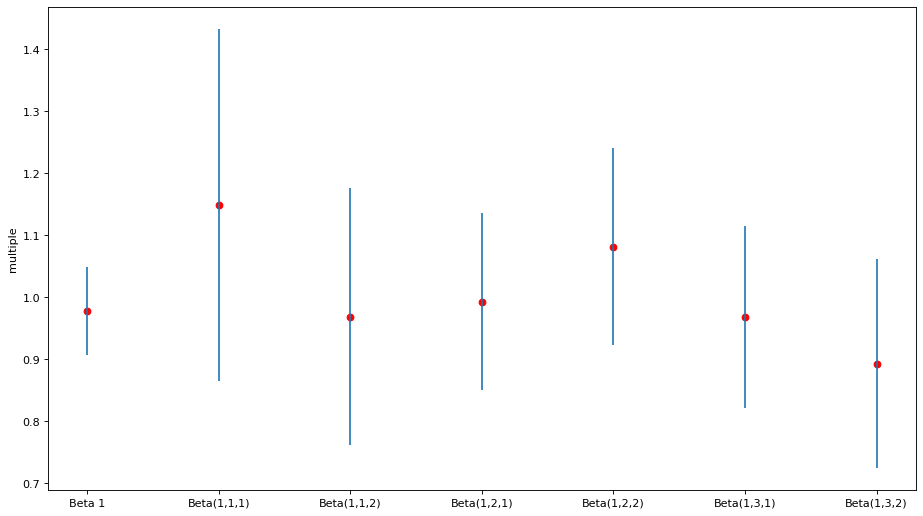

In [ ]:
## CI-plot 
alpha = 0.05

#subplot creates figure and axes objects
f, ax = plt.subplots(figsize=(14,8), dpi=80, facecolor='w', edgecolor='b', num=None)
plt.plot([1, 2, 3, 4,5,6,7], [reg_s1s2.params[1],reg_s1_12.params[1],reg_s1_13.params[1], reg_s1_14.params[1],reg_s2_12.params[1],reg_s2_13.params[1],reg_s2_14.params[1]], 'ro')
ax.set_ylabel("multiple")
ax.set_xticks([1, 2, 3, 4,5,6,7])
ax.set_xticklabels(["Beta 1","Beta(1,1,1)", "Beta(1,1,2)", "Beta(1,2,1)", "Beta(1,2,2)", "Beta(1,3,1)", "Beta(1,3,2)"])
plt.vlines(1, ymin= (reg_s1s2.conf_int(alpha)).iloc[1,0], ymax= reg_s1s2.conf_int(alpha).iloc[1,1])
plt.vlines(2, ymin= (reg_s1_12.conf_int(alpha)).iloc[1,0], ymax= reg_s1_12.conf_int(alpha).iloc[1,1])
plt.vlines(3, ymin= (reg_s1_13.conf_int(alpha)).iloc[1,0], ymax= reg_s1_13.conf_int(alpha).iloc[1,1])
plt.vlines(4, ymin= (reg_s1_14.conf_int(alpha)).iloc[1,0], ymax= reg_s1_14.conf_int(alpha).iloc[1,1])
plt.vlines(5, ymin= (reg_s2_12.conf_int(alpha)).iloc[1,0], ymax= reg_s2_12.conf_int(alpha).iloc[1,1])
plt.vlines(6, ymin= (reg_s2_13.conf_int(alpha)).iloc[1,0], ymax= reg_s2_13.conf_int(alpha).iloc[1,1])
plt.vlines(7, ymin= (reg_s2_14.conf_int(alpha)).iloc[1,0], ymax= reg_s2_14.conf_int(alpha).iloc[1,1])
plt.show()

In [ ]:
# Display squared t-statistic
t_test = reg_s1s2_12.tvalues[1]

In [ ]:
# Equivalent manual calculation
#Run Regression with intercept only
dat_s1s2_12_OLS_i = dat_s1s2_12_OLS
dat_s1s2_12_OLS_i = sm.add_constant(dat_s1s2_12_OLS_i['lgEBITDA'])
reg_s1s2_12_i = sm.OLS(dat_s1s2_12_OLS['lgEV'], dat_s1s2_12_OLS_i['const']).fit()

#Compute F-statistic
SSR_H0 = sum(reg_s1s2_12_i.resid**2)
SSR_H1 = sum(reg_s1s2_12.resid**2)
n = len(dat_s1s2_12['lgEV'])
F_test = (SSR_H0-SSR_H1)/(SSR_H1/(n-2))
F_test

172.8104288130076

In [ ]:
##For Comparison
t_test**2

172.8104288130086

In [ ]:
#Short Alternative in python for f Test
f_value = reg_s1s2_12.fvalue
f_value 

172.81042881300766

In [ ]:
### --ChowHypA------------
# squared sum of residuals of the three separate regressions
SSR_A_G1 = sum(reg_s1s2_12.resid**2)
SSR_A_G2 = sum(reg_s1s2_13.resid**2)
SSR_A_G3 = sum(reg_s1s2_14.resid**2)

# squared sum of residuals of the pooled regression (model under H_0 in hypothesis A)
SSR_H1 = sum(reg_s1s2.resid**2)

# number of total observations
n = len(dat_s1s2['lgEV'])
# number of regressors
p = 2
# number of distinct groups
G = 3

# Chow test statistic
Chow_A = ((SSR_H1 - sum((SSR_A_G1, SSR_A_G2, SSR_A_G3)))/(G*p)) / (sum((SSR_A_G1, SSR_A_G2, SSR_A_G3))/(n-G*p))

# Test decision - can H0 be rejected on a 5% significance level?
Chow_A > stats.f.ppf(0.95, dfn = G*p, dfd = n-G*p)

False

In [ ]:
SSR_B_G1 = sum(reg_s1.resid**2)
SSR_B_G2 = sum(reg_s2.resid**2)

G = 2

Chow_B = ((SSR_H1 - sum((SSR_B_G1, SSR_B_G2)))/(G*p)) / (sum((SSR_B_G1, SSR_B_G2))/(n-G*p))

Chow_B > stats.f.ppf(0.95, dfn = G*p, dfd = n-G*p)


False

In [ ]:
### --ChowHypC -----------------
SSR_C_G1 = sum(reg_s1_12.resid**2)
SSR_C_G2 = sum(reg_s1_13.resid**2)
SSR_C_G3 = sum(reg_s1_14.resid**2)
SSR_C_G4 = sum(reg_s2_12.resid**2)
SSR_C_G5 = sum(reg_s2_13.resid**2)
SSR_C_G6 = sum(reg_s2_14.resid**2)

G = 6

Chow_C = ((SSR_H1 - sum((SSR_C_G1, SSR_C_G2, SSR_C_G3, SSR_C_G4, SSR_C_G5, SSR_C_G6)))/(G*p)) / (sum((SSR_C_G1, SSR_C_G2, SSR_C_G3, SSR_C_G4, SSR_C_G5, SSR_C_G6))/(n-G*p))

Chow_C > stats.f.ppf(0.95, dfn = G*p, dfd = n-G*p)

False

In [ ]:
## --ChowHypD---------------------
SSR_D_G1 = sum(reg_s1_12.resid**2)
SSR_D_G2 = sum(reg_s1_14.resid**2)

# model under H_0
dat_s1_12_14 = pd.concat([dat_s1_12_OLS, dat_s1_14_OLS])
reg_s1_12_14 = sm.OLS(dat_s1_12_14['lgEV'], sm.add_constant(dat_s1_12_14['lgEBITDA'])).fit()

# squared sum of residuals in the model under H_0 
SSR_H1 = sum(reg_s1_12_14.resid**2)

# number of total observations
n = len(dat_s1_12_14['lgEV'])
# number of regressors
p = 2
# number of distinct groups
G = 2

Chow_D = ((SSR_H1 - sum((SSR_D_G1, SSR_D_G2)))/(G*p)) / (sum((SSR_D_G1, SSR_D_G2))/(n-G*p))

Chow_D > stats.f.ppf(0.95, dfn = G*p, dfd = n-G*p)

False

In [ ]:
## --- Predidction Mod1 --------------------------------
# Build subset for forecast
dat_s1s2_forecast = df_test[df_test['GICS.Sector'].isin([sec1,sec2])]

# Calculate forecasts based on (Mod 1)
Mod1_forecast = reg_s1s2.predict(sm.add_constant(dat_s1s2_forecast['lgEBITDA']))
Mod1_errors = dat_s1s2_forecast['lgEV'] - Mod1_forecast

In [ ]:
Mod1_RMSE = np.sqrt(np.mean(Mod1_errors**2))
Mod1_RMSE

0.2347831561014157

In [ ]:
Mod1_MAE  = np.mean(np.abs(Mod1_errors))
Mod1_MAE

0.19363534040481398

In [ ]:
#Build subset for (Mod3)
dat_s1_forecast = df_test[(df_test['GICS.Sector']==sec1)]
dat_s2_forecast = df_test[(df_test['GICS.Sector']==sec2)]

Mod3_s1_forecast = reg_s1.predict(sm.add_constant(dat_s1_forecast['lgEBITDA']))
Mod3_s2_forecast = reg_s2.predict(sm.add_constant(dat_s2_forecast['lgEBITDA']))

Mod3_errors = (pd.concat([dat_s1_forecast, dat_s2_forecast])['lgEV']) - pd.concat([Mod3_s1_forecast, Mod3_s2_forecast])

Mod3_RMSE = np.sqrt(np.mean(Mod3_errors**2))
Mod3_RMSE

0.2649041470574737

In [ ]:
Mod3_MAE  = np.mean(np.abs(Mod3_errors))
Mod3_MAE

0.2159945379923814